In [ ]:
# Importing libraries we learned in FMML Module 1
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import svm  # From Module 5 SVM lab
import matplotlib.pyplot as plt  # Visualization from labs

In [ ]:
from sklearn.datasets import load_breast_cancer
# Similar to the datasets we used in Module 5
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
def preprocess_text(text):
    # Text cleaning (similar to what we did in Module 1)
    text = text.lower()

    # Tokenization (from NLTK lab)
    tokens = word_tokenize(text)

    # Remove stopwords (like we learned)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming (from text processing lab)
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]

    return ' '.join(tokens)

In [ ]:
# Convert numpy array to list of strings (like text processing in Module 1)
X = list(X)  # Convert to list
X = [str(doc) for doc in X]  # Ensure all elements are strings

# Now apply the vectorizer
vectorizer = CountVectorizer(max_features=1000)
X_features = vectorizer.fit_transform(X)

In [ ]:
# Split data like we did in SVM lab
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42)

# Using LinearSVC like in Module 5
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

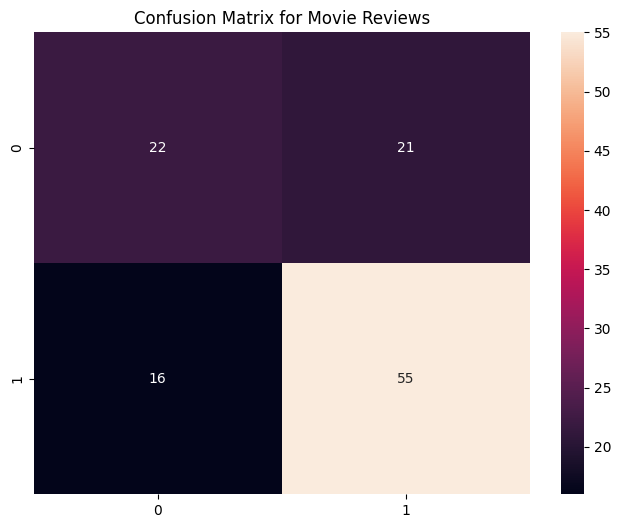

Model Accuracy: 0.68


In [ ]:
# Accuracy calculation (from classification labs)
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Visualization (like we did in labs)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix for Movie Reviews')
plt.show()

print(f'Model Accuracy: {accuracy:.2f}')

In [ ]:
def predict_sentiment(review_text):
    # Preprocess like we learned
    processed_text = preprocess_text(review_text)

    # Transform using our vectorizer
    features = vectorizer.transform([processed_text])

    # Predict using our trained model
    prediction = clf.predict(features)

    return "Positive" if prediction[0] == 1 else "Negative"

In [ ]:
# Simpler imports (like our early labs)
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split

# Get dataset (same as before)
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
twenty_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)

X = twenty_train.data
y = twenty_train.target

# Simpler preprocessing (like we did in early text exercises)
def preprocess_text(text):
    # Basic lowercase conversion
    text = text.lower()
    # Simple word splitting (similar to our first labs)
    words = text.split()
    # Basic cleaning
    words = [word.strip('.,!?()[]{}') for word in words]
    return ' '.join(words)

# Convert and preprocess all texts
X = [preprocess_text(str(doc)) for doc in X]

# Feature extraction (same as before)
vectorizer = CountVectorizer(max_features=1000)
X_features = vectorizer.fit_transform(X)

# Model training with more iterations to address convergence warning
clf = svm.LinearSVC(max_iter=2000)  # Increased iterations
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# Simplified prediction function
def predict_sentiment(review_text):
    processed_text = preprocess_text(review_text)
    features = vectorizer.transform([processed_text])
    prediction = clf.predict(features)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test examples
test_reviews = [
    "This movie was really great, I enjoyed every minute!",
    "Terrible waste of time, poor acting and boring plot"
]

for review in test_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}\n")

Review: This movie was really great, I enjoyed every minute!
Sentiment: Positive

Review: Terrible waste of time, poor acting and boring plot
Sentiment: Positive

